In [1]:
import numpy as np
import matplotlib.pyplot as plt
from probabilistic_models import run_probas

import sys
sys.path.append('..') 
from utils import create_mixing_matrix, load_data, run, consensus

0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.160
1-th round
lr 0.1 | average train loss 2.07 | test loss 2.01 | test acc: 0.585
2-th round
lr 0.1 | average train loss 1.28 | test loss 0.956 | test acc: 0.777
3-th round
lr 0.1 | average train loss 0.841 | test loss 0.593 | test acc: 0.836
4-th round
lr 0.1 | average train loss 0.704 | test loss 0.454 | test acc: 0.875
5-th round
lr 0.1 | average train loss 0.592 | test loss 0.369 | test acc: 0.901
6-th round
lr 0.1 | average train loss 0.462 | test loss 0.318 | test acc: 0.913
7-th round
lr 0.1 | average train loss 0.391 | test loss 0.277 | test acc: 0.922
8-th round
lr 0.1 | average train loss 0.357 | test loss 0.251 | test acc: 0.929
9-th round
lr 0.1 | average train loss 0.342 | test loss 0.229 | test acc: 0.934
[0.020035, 0.020321, 0.020333, 0.019154, 0.020535, 0.020211, 0.017761, 0.017832, 0.019235, 0.018837, 0.019913, 0.020932, 0.01743, 0.018044, 0.019507, 0.018824, 0.016511, 0.016043, 0.01851, 0.0173

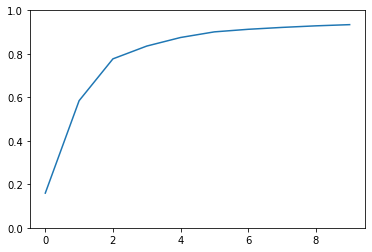

In [2]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.259
1-th round
lr 0.1 | average train loss 4.3 | test loss 1.96 | test acc: 0.602
2-th round
lr 0.1 | average train loss 5.54 | test loss 0.906 | test acc: 0.784
3-th round
lr 0.1 | average train loss 6.3 | test loss 0.554 | test acc: 0.850
4-th round
lr 0.1 | average train loss 6.9 | test loss 0.428 | test acc: 0.888
5-th round
lr 0.1 | average train loss 7.45 | test loss 0.363 | test acc: 0.900
6-th round
lr 0.1 | average train loss 7.85 | test loss 0.316 | test acc: 0.911
7-th round
lr 0.1 | average train loss 8.22 | test loss 0.278 | test acc: 0.921
8-th round
lr 0.1 | average train loss 8.52 | test loss 0.257 | test acc: 0.926
9-th round
lr 0.1 | average train loss 8.8 | test loss 0.239 | test acc: 0.931
[0.17533, 0.190428, 0.086464, 0.247371, 0.068365, 0.089519, 0.15456, 0.065452, 0.068322, 0.07832, 0.10498, 0.187395, 0.077679, 0.073989, 0.079428, 0.075261, 0.071288, 0.163534, 0.095674, 0.08118, 0.261671, 

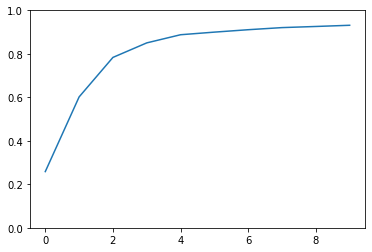

In [6]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
failure_rounds = probabilistic_model('exponential', 200, 10)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_probas(train_loader, test_loader, comm_matrix, num_rounds, 
                                               epochs, num_clients, failure_rounds, corr='local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.273
1-th round
lr 0.1 | average train loss 4.43 | test loss 2.12 | test acc: 0.513
2-th round
lr 0.1 | average train loss 5.94 | test loss 1.13 | test acc: 0.759
3-th round
lr 0.1 | average train loss 6.85 | test loss 0.613 | test acc: 0.842
4-th round
lr 0.1 | average train loss 7.6 | test loss 0.461 | test acc: 0.880
5-th round
lr 0.1 | average train loss 8.17 | test loss 0.363 | test acc: 0.904
6-th round
lr 0.1 | average train loss 8.61 | test loss 0.306 | test acc: 0.915
7-th round
lr 0.1 | average train loss 9.02 | test loss 0.274 | test acc: 0.922
8-th round
lr 0.1 | average train loss 9.38 | test loss 0.246 | test acc: 0.928
9-th round
lr 0.1 | average train loss 9.67 | test loss 0.225 | test acc: 0.934
[0.061725, 0.06259, 0.108251, 0.04255, 0.047904, 0.066476, 0.064382, 0.041004, 0.055306, 0.036415, 0.059585, 0.047657, 0.126256, 0.055457, 0.079324, 0.037889, 0.037522, 0.081238, 0.086414, 0.066652, 0.056

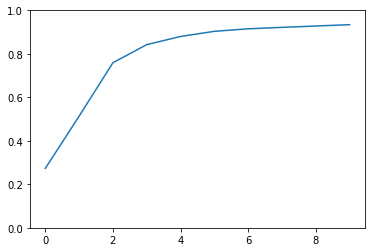

In [7]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
failure_rounds = probabilistic_model('normal', 200, [10, 4])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_probas(train_loader, test_loader, comm_matrix, num_rounds, 
                                               epochs, num_clients, failure_rounds, corr='local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

0-th round
lr 0.1 | average train loss 2.27 | test loss 2.27 | test acc: 0.444
1-th round
lr 0.1 | average train loss 4.27 | test loss 1.94 | test acc: 0.623
2-th round
lr 0.1 | average train loss 5.52 | test loss 0.904 | test acc: 0.793
3-th round
lr 0.1 | average train loss 6.3 | test loss 0.572 | test acc: 0.850
4-th round
lr 0.1 | average train loss 6.92 | test loss 0.418 | test acc: 0.889
5-th round
lr 0.1 | average train loss 7.45 | test loss 0.348 | test acc: 0.907
6-th round
lr 0.1 | average train loss 7.89 | test loss 0.298 | test acc: 0.917
7-th round
lr 0.1 | average train loss 8.26 | test loss 0.267 | test acc: 0.924
8-th round
lr 0.1 | average train loss 8.59 | test loss 0.242 | test acc: 0.929
9-th round
lr 0.1 | average train loss 8.9 | test loss 0.222 | test acc: 0.933
[0.023172, 0.021278, 0.02044, 0.021417, 0.022279, 0.01915, 0.020185, 0.02149, 0.021959, 0.020743, 0.022489, 0.019221, 0.017877, 0.019886, 0.019914, 0.019507, 0.019529, 0.017562, 0.018823, 0.019118, 0.0201

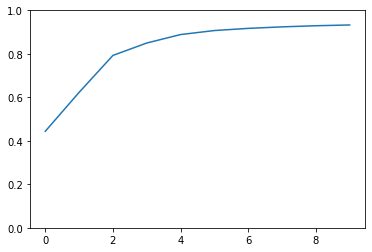

In [8]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
failure_rounds = probabilistic_model('weibull', 200, [1, 10])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_probas(train_loader, test_loader, comm_matrix, num_rounds, 
                                               epochs, num_clients, failure_rounds, corr='local')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

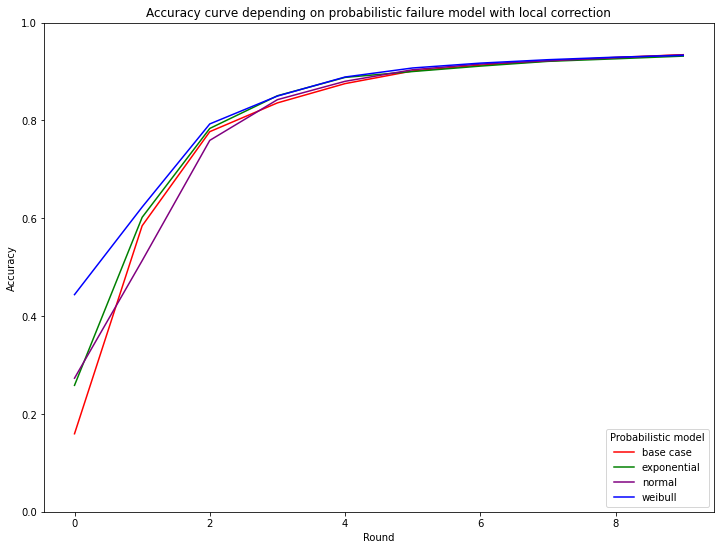

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="red", label="base case")
ax.plot(x, accs1, color="green", label="exponential")
ax.plot(x, accs2, color="purple", label="normal")
ax.plot(x, accs3, color="blue", label="weibull")


plt.legend(loc="lower right", title="Probabilistic model")
plt.title("Accuracy curve depending on probabilistic failure model with local correction")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()